In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score

In [4]:
x, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20, random_state=13)

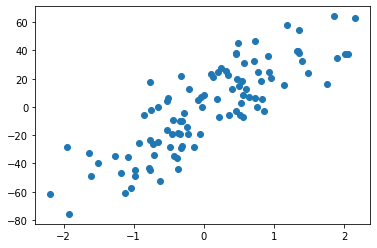

In [5]:
plt.scatter(x,y)

In [31]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [6]:
from sklearn.linear_model import LinearRegression

In [32]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [33]:
print(f"Incercept : {lr.intercept_}, Slope = {lr.coef_}")

Incercept : -2.2710144261783825, Slope = [28.12597332]


In [42]:
y_pred = lr.predict(x_test)
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.6345158782661012

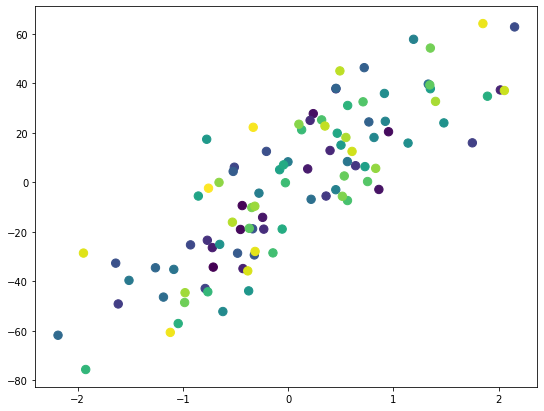

In [35]:
plt.figure(figsize=(9,7))
t = np.arange(len(x))
plt.scatter(x,y,c=t,s=70)

In [36]:
class GDRegressor:
    def __init__(self,learning_rate, epochs):
        self.m = 100
        self.b = -120
        self.epochs = epochs
        self.lr = learning_rate
    
    def fit(self,x,y):
        # Calculating the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m * x.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m * x.ravel() - self.b)*x.ravel())

            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)



        print(f"Intercept = {self.b}, Slope = {self.m}")
    def predict(self,x):
        return self.m*x + self.b

In [37]:
gd = GDRegressor(0.001,100)

In [39]:
gd.fit(x_train,y_train)

Intercept = -2.271014412294681, Slope = 28.125973287523816


In [41]:
gd.predict(12)

335.2406650379911

In [43]:
y_pred = gd.predict(x_test)
r2_score(y_test, y_pred)

0.6345158783804388